### Import necessary libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from statsmodels.formula.api import ols
from scipy import stats
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from math import sqrt

import scipy, matplotlib
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
import warnings

mainData = pd.read_csv('clean_dataframe.csv')
sb.set() # set the default Seaborn style for graphics

In [2]:
Critic_Scores = pd.DataFrame(mainData['Critic_Score'])
User_Scores = pd.DataFrame(mainData['User_Score'])
Global_Sales = pd.DataFrame(mainData['Global_Sales'])
Year_Release = pd.DataFrame(mainData['Year_of_Release'])

To model the relationship between global variable and other variables. To predict the global sales based on the value of an input variable. We used Linear Regression Model.

We split the dataset into train and test sets, with a ratio of 80% to 20% respectively, and plotted the variables against Global Sales. 

### Linear Regression function

In [3]:
def linearRegression(predictor, response, testsize): # linearRegression(grlivarea, price,0.2)
    # train_test_split returns 4 values
    # Split the Dataset into Train and Test, with test_size= 0.2 if predictor total 1000, X_train: 800 data pts, X_test: 200 data pts 
    X_train, X_test, y_train, y_test = train_test_split(predictor, response, test_size = testsize)

    # Linear Regression using Train Data
    linreg = LinearRegression()         # create the linear regression object
    linreg.fit(X_train, y_train)        # train the linear regression model

    # Coefficients of the Linear Regression line
    print('Intercept of Regression \t: b = ', linreg.intercept_)
    print('Coefficients of Regression \t: a = ', linreg.coef_)
    print()

    # Predict Total values corresponding to HP
    y_train_pred = linreg.predict(X_train)
    y_test_pred = linreg.predict(X_test)

    # Check the Goodness of Fit (on Train Data)
    print("Goodness of Fit of Model \tTrain Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
    print()

    # Check the Goodness of Fit (on Test Data)
    print("Goodness of Fit of Model \tTest Dataset")
    print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
    print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
    print()

    # Plot the Predictions vs the True values
    f, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].scatter(y_train, y_train_pred, color = "blue")
    axes[0].plot(y_train, y_train, 'r-', linewidth = 1)
    axes[0].set_xlabel("True values of the Response Variable (Train)")
    axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
    axes[1].scatter(y_test, y_test_pred, color = "green")
    axes[1].plot(y_test, y_test, 'r-', linewidth = 1)
    axes[1].set_xlabel("True values of the Response Variable (Test)")
    axes[1].set_ylabel("Predicted values of the Response Variable (Test)")

    plt.show()


### Linear Relation Between User Score and Critic Score

Intercept of Regression 	: b =  [34.48446506]
Coefficients of Regression 	: a =  [[5.1190848]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.28826849747378025
Mean Squared Error (MSE) 	: 121.85865822678943

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.29950645388834396
Mean Squared Error (MSE) 	: 122.84882537405889



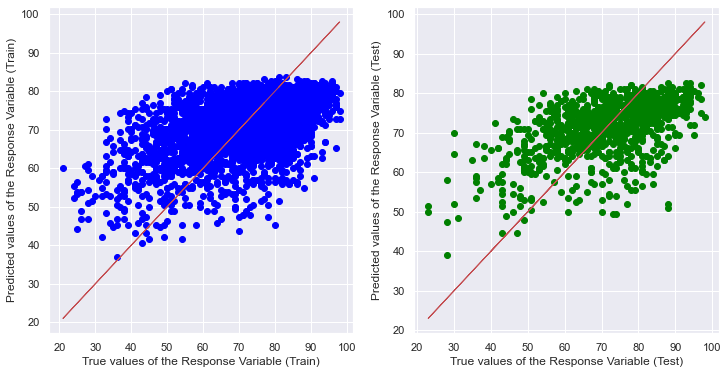

In [4]:
linearRegression(User_Scores, Critic_Scores ,0.2)

User Score and Critic Score has a high correlation

### Linear Relation Between Critic Scores and Global Sales

Intercept of Regression 	: b =  [-1.95431972]
Coefficients of Regression 	: a =  [[0.03972811]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.07213523753929707
Mean Squared Error (MSE) 	: 3.468329688152945

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.09392696581170734
Mean Squared Error (MSE) 	: 2.6602948397882575



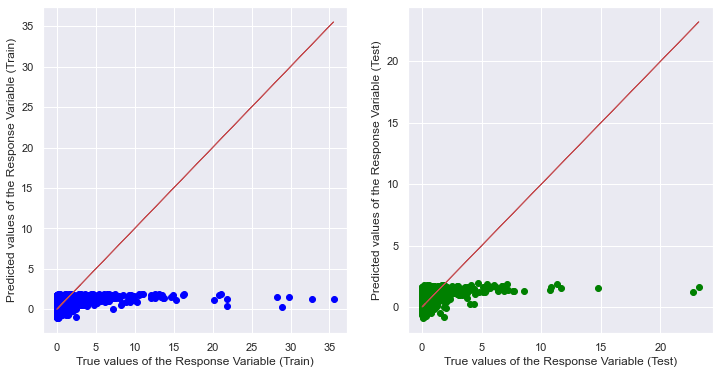

In [5]:
linearRegression(Critic_Scores, Global_Sales ,0.2)

Critic Scores and Global Sales seem to have little to no relation between the Critic Score and Global Sales.

### Linear Relation Between User Score and Global Sales

Intercept of Regression 	: b =  [0.09512434]
Coefficients of Regression 	: a =  [[0.11011256]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.006615357141689371
Mean Squared Error (MSE) 	: 3.4677622041015304

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.011747620424293781
Mean Squared Error (MSE) 	: 3.8778713063538683



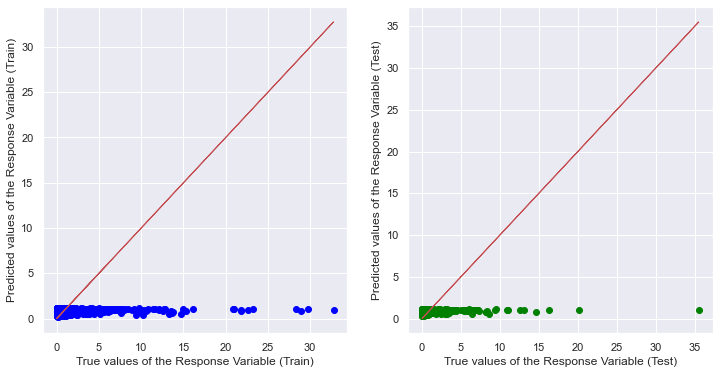

In [6]:
linearRegression(User_Scores, Global_Sales ,0.2)

User Score and Global Sales seem to have little to no relation between the User Score and Global Sales.

### Linear Relation Between Year of Release and Global Sales

Intercept of Regression 	: b =  [-10.90276359]
Coefficients of Regression 	: a =  [[0.00587632]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.00016321037346966882
Mean Squared Error (MSE) 	: 3.6240593779242865

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.001578897105337207
Mean Squared Error (MSE) 	: 3.3831301196758314



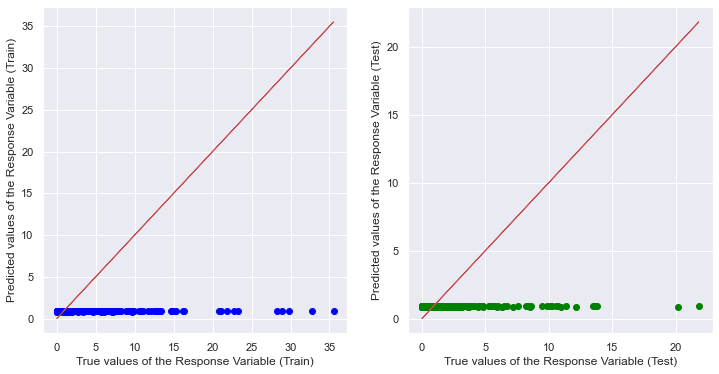

In [7]:
linearRegression(Year_Release,Global_Sales ,0.2)

Year of Release and Global Sales seem to have little to no relation between the Year of Release and Global Sales.

## Multi-Linear Relation Between (User Score and Critic Score) and Global Sales

Intercept of Regression 	: b =  [-1.52347788]
Coefficients of Regression 	: a =  [[ 0.04480904 -0.10935261]]

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0797065942274029
Mean Squared Error (MSE) 	: 3.1366335704685717

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.08376298013518324
Mean Squared Error (MSE) 	: 3.897871837946759



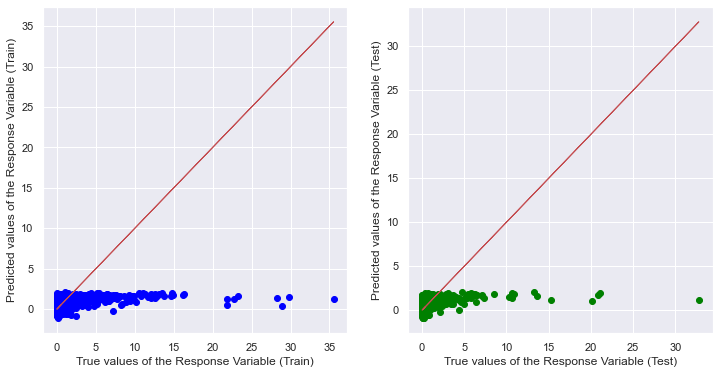

In [8]:
ConditionData = mainData[['Critic_Score','User_Score']]
linearRegression(ConditionData, Global_Sales ,0.2)

(User Score with Critic Score) and Global Sales seem to have little to no relation between the variables and Global Sales.
